[  8.98405264e+00   8.57973366e-05   1.04796106e-04   8.86320460e+01
   3.18565746e+01   2.57914379e+00]


<IPython.core.display.Javascript object>


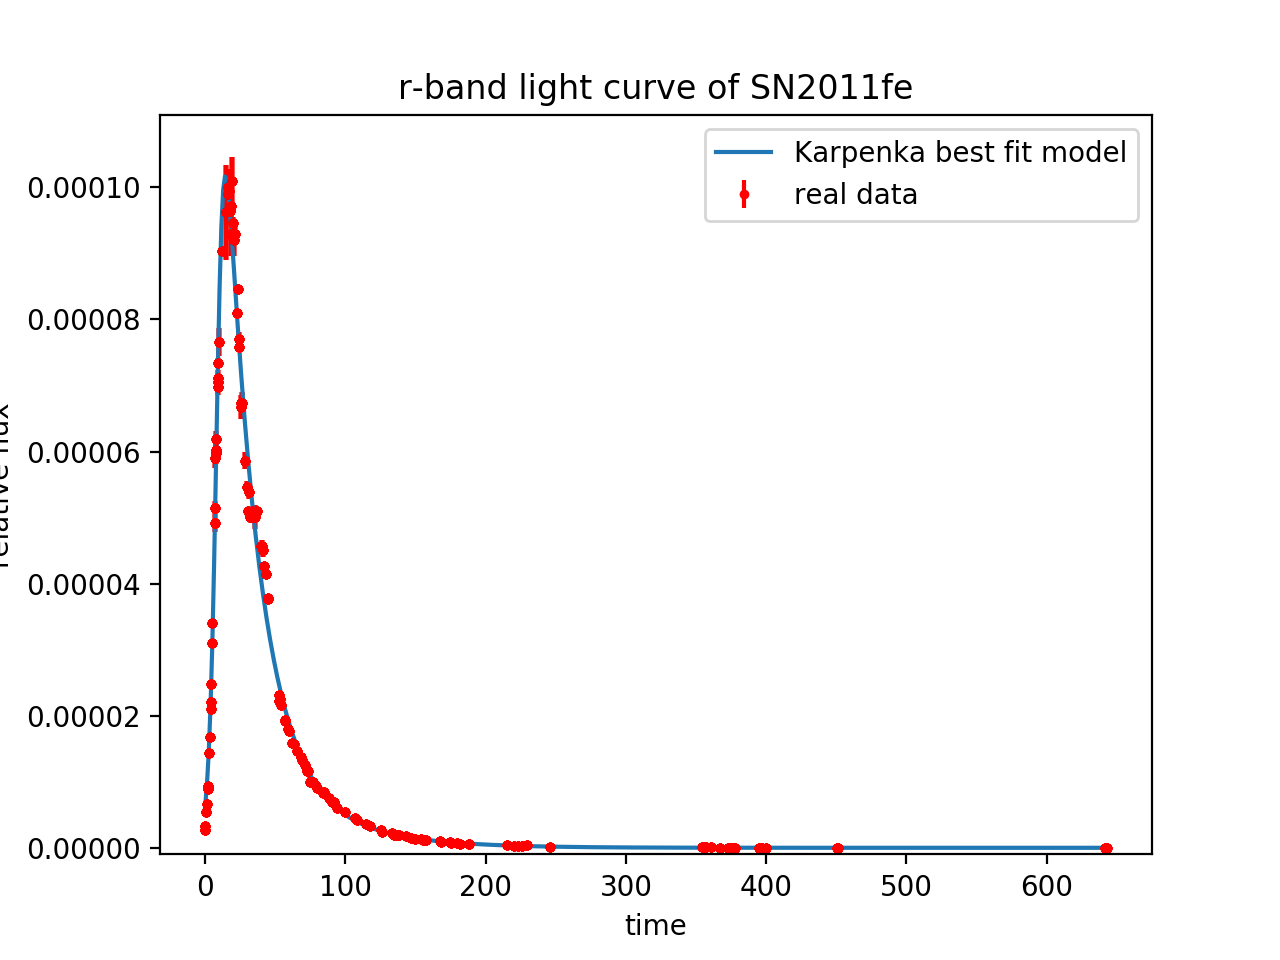

In [63]:
# import relevant python libraries
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib notebook

# open and load the data 
source = open("SN2011fe.json")
json_data = json.load(source)

#limit JSON data to just photometry elements
photo_data = json_data['SN2011fe']['photometry'] 

#populate an array of just the R band elements

for r in range(len(photo_data) - 1):
    if('band' in photo_data[r] and photo_data[r]['band'] == 'R'):
        r_bands.append(photo_data[r])

#create arrays to hold the time and corresponding magnitude and error
magnitudes = []
mag_errors = []
times = []


#populate the arrays
for r in r_bands:
	magnitudes.append(float(r['magnitude']))
	times.append(float(r['time']))
	mag_errors.append(float(r['e_magnitude']))


#convert magnitudes to flux
magnitudes = np.array(magnitudes)
flux = 10**(-2*magnitudes / 5) 

#convert magnitude errors to flux errors
mag_errors = np.array(mag_errors)
mag_max = magnitudes + mag_errors
flux_max = 10**(-2*mag_max / 5)
flux_errors = flux_max - flux


#define Kapernka function to model data
def FitFunc_(t, t_0, A, B, t_1, Tfall, Trise):
	first = A * (1 + (B * (t - t_1)*(t - t_1)))
	var = -(t - t_0)
	second = np.exp(var / Tfall)
	third = 1 + np.exp(var / Trise)
	return first * (second / third)
	
#shift times to start at 0; for curve_fit to function
times_ = np.array(times)
times_ = times_ - times_[0]


#store priors for the model coefficients
priors = [50, 20, 20, 50, 50, 50]

#find the bestfit coefficients for the Kapenka model
fitCoeffs, Covars = curve_fit(FitFunc_, times_, flux, priors)

print(fitCoeffs)
#Store the coefficients
bestfit_t = np.linspace(times2[0], times2[-1], 500)
bestfit_t_0 = fitCoeffs[0]
bestfit_A = fitCoeffs[1]
bestfit_B = fitCoeffs[2]
bestfit_t_1 = fitCoeffs[3]
bestfit_Tfall = fitCoeffs[4]
bestfit_Trise = fitCoeffs[5]


#Grab bestfit fluxes
bestfit_flux = FitFunc_(bestfit_t, bestfit_t_0, bestfit_A, bestfit_B, bestfit_t_1, bestfit_Tfall, bestfit_Trise)


#Plot data and bestfit line
plt.errorbar(times_, flux, yerr=flux_errors, color='red', label='real data', fmt = 'o', markersize = 2.5)
plt.plot(bestfit_t, bestfit_flux, label='Karpenka best fit model')
ax = plt.gca()
ax.set_ylim([-0.000001, np.amax(flux) + .00001])
plt.legend()
plt.title('r-band light curve of SN2011fe')
plt.xlabel('time')
plt.ylabel('relative flux')
plt.show()

In [70]:
#create array to hold model predicted fluxes
flux_predictions = np.empty(len(flux))


#loop to run 'leave one out' CV
for ind, f in enumerate(flux):
    flux_del = np.delete(flux, ind)
    times_del = np.delete(times_, ind)
    
    Coeffs, Covar = curve_fit(FitFunc_, times_del, flux_del, priors)
    ypred = FitFunc_(times_[ind], Coeffs[0], Coeffs[1], Coeffs[2], Coeffs[3], Coeffs[4], Coeffs[5])
    
   

    
#RMSE calculations


dif = flux_predictions - flux
print(np.max(dif))
temp = np.sum((flux_predictions - flux)**2)
temp = temp/(len(flux))
RMSE = np.sqrt(temp)


    
    

    
    
   
    

/Users/ethanmarx/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: overflow encountered in exp


16.197010167
1612.65692287
40.1578998813


(array([0, 1]), array([1]))
